# Using the XGBoost Classifier

In this notebook we will look at how you can use the XGBoost classifier (https://xgboost.ai). The structure will be the same as previously undertaken when using the scikit-learn module but the RSGISLib functions called are a bit different and we use a baysian optimisation to optimise the parameters rather than a grid-search.


## Running Notebook

The notebook has been run and saved with the outputs so you can see what the outputs should be and so the notebook and be browsed online without having to run the notebook for it to make sense. 

If you are running the notebook for yourself it is recommended that you clear the existing outputs which can be done by running one of the following options depending on what system you are using:

**Jupyter-lab**:

> \> _Edit_ \> _'Clear All Outputs'_

**Jupyter-notebook**:

> \> _Cell_ \> _'All Outputs'_ \> _Clear_

# 1. Import Modules

In [1]:
import os

import geopandas

# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import rsgislib.classification
import rsgislib.classification.classxgboost
import rsgislib.tools.plotting
import rsgislib.tools.utils
import rsgislib.vectorutils
from rsgislib.classification import ClassInfoObj

# Import the function to calculate the accuracy stats
from rsgislib.classification.classaccuracymetrics import calc_acc_metrics_vecsamples
from rsgislib.imageutils import ImageBandInfo

/home/pete/.conda/envs/osgeo-env-v3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 2. Create Output Directory

In [2]:
out_cls_dir = "cls_xgb_results"
if not os.path.exists(out_cls_dir):
    os.mkdir(out_cls_dir)

# 3. Define the Input Image

In [3]:
input_img = "../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m.tif"
imgs_info = []
imgs_info.append(
    ImageBandInfo(
        file_name=input_img, name="sen2", bands=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    )
)

valid_img = "../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m_vmsk.tif"

# 4. Define Sample Data and Class Colours

In [4]:
cls_smpl_info = dict()
cls_smpl_info["Artificial_Surfaces"] = ClassInfoObj(
    id=0,
    out_id=1,
    train_file_h5="training_data/artificial_surfaces_refl_smpls_train.h5",
    test_file_h5="training_data/artificial_surfaces_refl_smpls_test.h5",
    valid_file_h5="training_data/artificial_surfaces_refl_smpls_valid.h5",
    red=160,
    green=160,
    blue=160,
)
cls_smpl_info["Bare_Rock_Sand"] = ClassInfoObj(
    id=1,
    out_id=2,
    train_file_h5="training_data/bare_rock_sand_refl_smpls_train.h5",
    test_file_h5="training_data/bare_rock_sand_refl_smpls_test.h5",
    valid_file_h5="training_data/bare_rock_sand_refl_smpls_valid.h5",
    red=100,
    green=100,
    blue=100,
)
cls_smpl_info["Bracken"] = ClassInfoObj(
    id=2,
    out_id=3,
    train_file_h5="training_data/bracken_refl_smpls_train.h5",
    test_file_h5="training_data/bracken_refl_smpls_test.h5",
    valid_file_h5="training_data/bracken_refl_smpls_valid.h5",
    red=235,
    green=146,
    blue=38,
)
cls_smpl_info["Conifer_Forest"] = ClassInfoObj(
    id=3,
    out_id=4,
    train_file_h5="training_data/conifer_forest_refl_smpls_train.h5",
    test_file_h5="training_data/conifer_forest_refl_smpls_test.h5",
    valid_file_h5="training_data/conifer_forest_refl_smpls_valid.h5",
    red=2,
    green=97,
    blue=16,
)
cls_smpl_info["Deciduous_Forest"] = ClassInfoObj(
    id=4,
    out_id=5,
    train_file_h5="training_data/deciduous_forest_refl_smpls_train.h5",
    test_file_h5="training_data/deciduous_forest_refl_smpls_test.h5",
    valid_file_h5="training_data/deciduous_forest_refl_smpls_valid.h5",
    red=50,
    green=184,
    blue=69,
)
cls_smpl_info["Grass_Long"] = ClassInfoObj(
    id=5,
    out_id=6,
    train_file_h5="training_data/grass_long_refl_smpls_train.h5",
    test_file_h5="training_data/grass_long_refl_smpls_test.h5",
    valid_file_h5="training_data/grass_long_refl_smpls_valid.h5",
    red=150,
    green=227,
    blue=18,
)
cls_smpl_info["Grass_Short"] = ClassInfoObj(
    id=6,
    out_id=7,
    train_file_h5="training_data/grass_short_refl_smpls_train.h5",
    test_file_h5="training_data/grass_short_refl_smpls_test.h5",
    valid_file_h5="training_data/grass_short_refl_smpls_valid.h5",
    red=194,
    green=219,
    blue=66,
)
cls_smpl_info["NonPhoto_Veg"] = ClassInfoObj(
    id=7,
    out_id=8,
    train_file_h5="training_data/nonphoto_veg_refl_smpls_train.h5",
    test_file_h5="training_data/nonphoto_veg_refl_smpls_test.h5",
    valid_file_h5="training_data/nonphoto_veg_refl_smpls_valid.h5",
    red=98,
    green=225,
    blue=227,
)
cls_smpl_info["Scrub"] = ClassInfoObj(
    id=8,
    out_id=9,
    train_file_h5="training_data/scrub_refl_smpls_train.h5",
    test_file_h5="training_data/scrub_refl_smpls_test.h5",
    valid_file_h5="training_data/scrub_refl_smpls_valid.h5",
    red=0,
    green=80,
    blue=0,
)
cls_smpl_info["Water"] = ClassInfoObj(
    id=9,
    out_id=10,
    train_file_h5="training_data/water_refl_smpls_train.h5",
    test_file_h5="training_data/water_refl_smpls_test.h5",
    valid_file_h5="training_data/water_refl_smpls_valid.h5",
    red=0,
    green=0,
    blue=255,
)

# 5. Optimise and Train the Classifier

In [5]:
out_mdl_file = os.path.join(out_cls_dir, "refl_cls_xgb_mdl.h5")
rsgislib.classification.classxgboost.train_opt_xgboost_multiclass_classifier(out_mdl_file, cls_smpl_info)

Reading Class Artificial_Surfaces Training
Reading Class Artificial_Surfaces Validation
Reading Class Artificial_Surfaces Testing
Reading Class Bare_Rock_Sand Training
Reading Class Bare_Rock_Sand Validation
Reading Class Bare_Rock_Sand Testing
Reading Class Bracken Training
Reading Class Bracken Validation
Reading Class Bracken Testing
Reading Class Conifer_Forest Training
Reading Class Conifer_Forest Validation
Reading Class Conifer_Forest Testing
Reading Class Deciduous_Forest Training
Reading Class Deciduous_Forest Validation
Reading Class Deciduous_Forest Testing
Reading Class Grass_Long Training
Reading Class Grass_Long Validation
Reading Class Grass_Long Testing
Reading Class Grass_Short Training
Reading Class Grass_Short Validation
Reading Class Grass_Short Testing
Reading Class NonPhoto_Veg Training
Reading Class NonPhoto_Veg Validation
Reading Class NonPhoto_Veg Testing
Reading Class Scrub Training
Reading Class Scrub Validation
Reading Class Scrub Testing
Reading Class Water

# 6. Apply Classifier

In [6]:
out_cls_img = os.path.join(out_cls_dir, "cls_xgb_refl.kea")

rsgislib.classification.classxgboost.apply_xgboost_multiclass_classifier(
    cls_smpl_info, out_mdl_file, valid_img, 1, imgs_info, out_cls_img, "KEA"
)


Applying the Classifier


  0%|          | 0/100 [00:00<?, ?it/s]

Completed Classification
Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.

Apply Colour to class 'Artificial_Surfaces'
Apply Colour to class 'Bare_Rock_Sand'
Apply Colour to class 'Bracken'
Apply Colour to class 'Conifer_Forest'
Apply Colour to class 'Deciduous_Forest'
Apply Colour to class 'Grass_Long'
Apply Colour to class 'Grass_Short'
Apply Colour to class 'NonPhoto_Veg'
Apply Colour to class 'Scrub'
Apply Colour to class 'Water'


# 7. Visualise the Classification Result

Image Data Size: 3295 x 2880


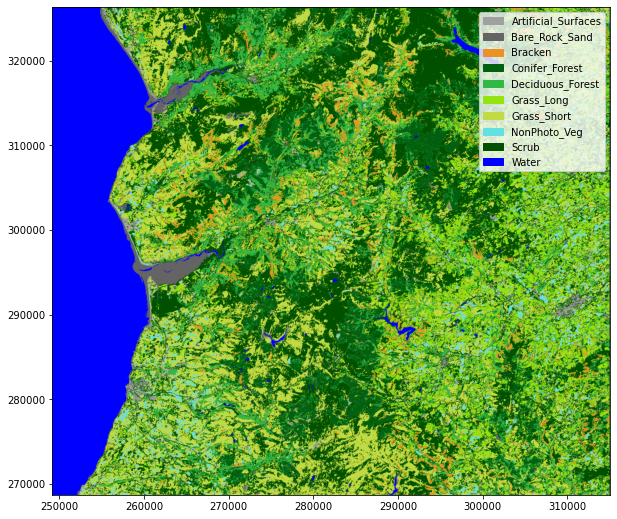

In [7]:
# Define a look up table (LUT) for the class names
# to be used to generate the legend for the map.
cls_names_lut = dict()
for cls_name in cls_smpl_info:
    cls_names_lut[cls_smpl_info[cls_name].out_id] = cls_name


# Get the image data using the get_gdal_thematic_raster_mpl_imshow function.
(
    img_data,
    img_coords,
    lgd_patches,
) = rsgislib.tools.plotting.get_gdal_thematic_raster_mpl_imshow(
    out_cls_img, out_patches=True, cls_names_lut=cls_names_lut
)

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Use the imshow function to display the image data within the plot
# the extent option defines the x and y axis values.
ax.imshow(img_data, extent=img_coords)

# Add the legend to the plot using the patches from the
# get_gdal_thematic_raster_mpl_imshow function.
ax.legend(handles=lgd_patches)

# 8. Create Accuracy Output Directories

In [8]:
out_pts_dir = "acc_pts"
if not os.path.exists(out_pts_dir):
    os.mkdir(out_pts_dir)

out_stats_dir = "acc_stats"
if not os.path.exists(out_stats_dir):
    os.mkdir(out_stats_dir)

# 9. Define Input Reference Points

In [9]:
vec_file = "../data/cls_data/cls_acc_assessment_pts_ref.geojson"
vec_lyr = "cls_acc_assessment_pts_ref"

# 10. Copy Existing Points File

To avoid overwriting and editting the input file provided we will first copy it into our output directory.

In [10]:
vec_refpts_file = os.path.join(
    out_pts_dir, "cls_acc_assessment_pts_xgb_ref.geojson"
)
vec_refpts_lyr = "cls_acc_assessment_pts_xgb_ref"

rsgislib.vectorutils.vector_translate(
    vec_file,
    vec_lyr,
    vec_refpts_file,
    vec_refpts_lyr,
    out_format="GeoJSON",
    del_exist_vec=True,
)

 10%|███████▋                                                                    | 101/1000 [00:00<00:00, 6553.80it/s]


# 11. Populate Reference Points

In [11]:
rsgislib.classification.pop_class_info_accuracy_pts(
    input_img=out_cls_img,
    vec_file=vec_refpts_file,
    vec_lyr=vec_refpts_lyr,
    rat_class_col="class_names",
    vec_class_col="xgb_cls",
    vec_ref_col=None,
    vec_process_col=None,
)

# 12. Filter Valid Points

Some classifiers can produce no data regions and if those intersect with reference points then an error will occur when calculating the accuracy statistics so we need to remove those which we will do using geopandas. For points where there is no class (i.e., no data) in the input classification then the value `"NA"` is outputted into the attribute table and it is rows with an `"NA"` value that we want to remove.


In [12]:
vec_refpts_vld_file = os.path.join(
    out_pts_dir, "cls_acc_assessment_pts_xgb_ref_vld.geojson"
)
vec_refpts_vld_lyr = "cls_acc_assessment_pts_xgb_ref_vld"
points_gdf = geopandas.read_file(vec_refpts_file)
points_gdf = points_gdf.drop(points_gdf[points_gdf["xgb_cls"] == "NA"].index)
points_gdf.to_file(vec_refpts_vld_file, driver="GeoJSON")
points_gdf

/home/pete/.conda/envs/osgeo-env-v3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,ref_pts,xgb_cls,geometry
0,Bare_Rock_Sand,Grass_Short,POINT (293492.332 306597.255)
1,Artificial_Surfaces,Artificial_Surfaces,POINT (312462.332 304967.255)
2,Bare_Rock_Sand,Bare_Rock_Sand,POINT (306412.332 293567.255)
3,Artificial_Surfaces,Artificial_Surfaces,POINT (259012.332 309877.255)
4,Artificial_Surfaces,Artificial_Surfaces,POINT (305842.332 323467.255)
...,...,...,...
995,Water,Water,POINT (250902.332 316807.255)
996,Water,Water,POINT (257912.332 297147.255)
997,Water,Water,POINT (249762.332 311677.255)
998,Water,Water,POINT (253712.332 295707.255)


# 13. Calculate the Accuracy Statistics

In [13]:
out_json_file = os.path.join(out_stats_dir, "cls_xgb_cls_acc_info.json")
out_csv_file = os.path.join(out_stats_dir, "cls_xgb_cls_acc_info.csv")

calc_acc_metrics_vecsamples(
    vec_file=vec_refpts_vld_file,
    vec_lyr=vec_refpts_vld_lyr,
    ref_col="ref_pts",
    cls_col="xgb_cls",
    cls_img=out_cls_img,
    img_cls_name_col="class_names",
    img_hist_col="Histogram",
    out_json_file=out_json_file,
    out_csv_file=out_csv_file,
)

# 14. Reading the JSON file

Let's now have a look at the JSON file which has been outputted. One thing you will notice is this isn't the most user friendly way of presenting this data, hence why the function also outputs a CSV. However, it easy to read out particular values in python, as shown below.

In [14]:
import pprint

cls_acc_stats_dict = rsgislib.tools.utils.read_json_to_dict(out_json_file)
pprint.pprint(cls_acc_stats_dict)

{'Artificial_Surfaces': {'f1-score': 0.6274509803921569,
                         'precision': 0.5517241379310345,
                         'recall': 0.7272727272727273,
                         'support': 66},
 'Bare_Rock_Sand': {'f1-score': 0.5783132530120482,
                    'precision': 0.5217391304347826,
                    'recall': 0.6486486486486487,
                    'support': 74},
 'Bracken': {'f1-score': 0.6744186046511628,
             'precision': 0.8529411764705882,
             'recall': 0.5576923076923077,
             'support': 52},
 'Conifer_Forest': {'f1-score': 0.8877005347593583,
                    'precision': 1.0,
                    'recall': 0.7980769230769231,
                    'support': 104},
 'Deciduous_Forest': {'f1-score': 0.7643979057591622,
                      'precision': 0.7934782608695652,
                      'recall': 0.7373737373737373,
                      'support': 99},
 'Grass_Long': {'f1-score': 0.6987951807228916,
           

In [15]:
print("Overall Accuracy: {}".format(cls_acc_stats_dict["accuracy"]))
print("Macro F1 Score: {}".format(cls_acc_stats_dict["macro avg"]["f1-score"]))
print(
    "Area Weighted F1 Score: {}".format(
        cls_acc_stats_dict["weighted area avg"]["f1-score"]
    )
)

Overall Accuracy: 0.6906906906906907
Macro F1 Score: 0.6946504355837639
Area Weighted F1 Score: 0.6527985241021752
